### 목표 : 무게에 따른 길이를 예측하는 모델
1. data : fish.csv
2. feature : Weight
2. target : length
3. 학습방법 : 지도학습 + 예측 -> KNN 기반 회귀
4. 학습/테스트 데이터 : 7:3

In [187]:
# 0. 모듈 준비
import pandas as pd 
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import matplotlib.pyplot as plt 

In [188]:
# 1. 데이터 준비
fish_df = pd.read_csv('../DATA/fish.csv', usecols=[0,1,2])
perch_df = fish_df[fish_df['Species'] == 'Perch'].reset_index(drop=True)
perch_df.describe()

,Weight,Length
count,56.000000,56.000000
mean,382.239286,27.892857
std,347.617717,9.021668
min,5.900000,8.400000
25%,120.000000,21.825000
50%,207.500000,25.300000
75%,692.500000,36.625000
max,1100.000000,44.000000


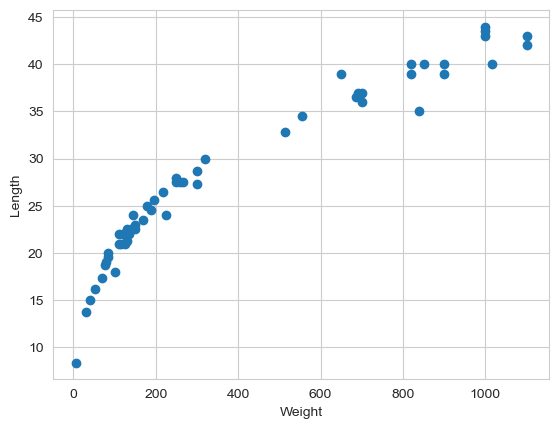

,Weight,Length
Weight,1.000000,0.958656
Length,0.958656,1.000000


In [189]:
# 2. 데이터 전처리
plt.scatter(perch_df['Weight'], perch_df['Length'])
plt.xlabel('Weight')
plt.ylabel('Length')
plt.show()  # 값이 클수록 일관성이 낮다.
perch_df.corr(numeric_only=True)    # 높은 상관관계를 보인다 (0.958)

In [190]:
# 3. 지도학습
# 3-1. 학습 데이터 나누기
X_train, X_test, y_train, y_test = train_test_split(perch_df[['Weight']], perch_df['Length'], 
                                                    train_size=0.7, random_state=13)
# => Weight를 기준으로 Length를 예측하는 모델

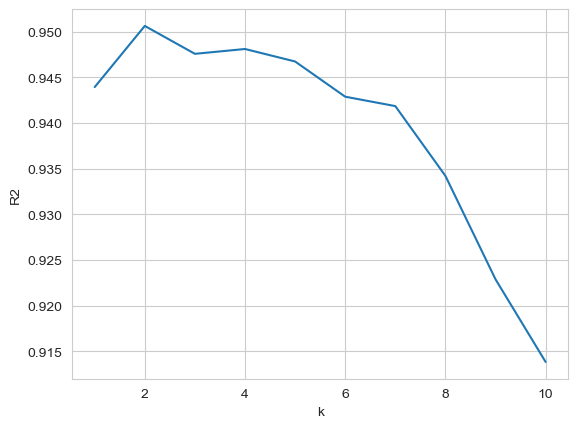

max(R2) : 0.950632520472237
k : 2


In [191]:
# 3-2. n_neighbors 값 변화에 따른 모델 성능 비교
# : k 값에 따른 R2 차이 확인
max_k = 10
r2_list = []
for k in range(1, max_k+1):
    knn_model = KNeighborsRegressor(n_neighbors=k)
    knn_model.fit(X_train, y_train)
    k_pred = knn_model.predict(X_test)
    k_r2 = r2_score(y_test, k_pred)
    r2_list.append(k_r2)
    # print(f'k: {k}, R2: {k_r2}')

plt.plot(range(1, max_k+1), r2_list)
plt.xlabel('k')
plt.ylabel('R2')
plt.show()

print('max(R2) :', max(r2_list))
max_K = r2_list.index(max(r2_list))+1
print('k :', max_K)

In [192]:
# 3-3. 모델 생성
knn_model = KNeighborsRegressor(max_K)

In [193]:
# 3-4. 학습
knn_model.fit(X_train, y_train)

# 3-4-2. 과소적합 확인
knn_model.score(X_train, y_train)   # 0.978 : 높은 적합성을 보임

0.9900053217820478

In [194]:
# 4. 예측
y_pred = knn_model.predict(X_test)
y_pred
# y_pre = model.predict(perchDF[['Weight']])

array([27.5 , 19.3 , 23.55, 43.75, 14.35, 21.  , 37.75, 37.5 , 37.5 ,
       19.3 , 43.75, 25.1 , 37.75, 29.35, 21.  , 24.8 , 37.75])

In [195]:
# 5. 성능 평가
# - 과대 적합을 판단할 수 있다.
#   : 예측값과 실제값의 차이를 나타낸 지표로 
# 1) MSE
print('1) MSE:', mean_squared_error(y_test, y_pred))
# 2) MAE
print('2) MAE:', mean_absolute_error(y_test, y_pred))
# 3) R2
r2_scores = r2_score(y_test, y_pred)
print('3) R2:', r2_scores)
# 4) RMSE
rmse = mean_squared_error(y_test, y_pred, squared=False)
print('4) RMSE:', rmse)

1) MSE: 4.458235294117647
2) MAE: 1.5352941176470591
3) R2: 0.950632520472237
4) RMSE: 2.111453360630456


In [201]:
# New data (Weight) 결과 예측
new_weight = 405
new_data = pd.DataFrame([[new_weight]], columns=['Weight'])
n_pred = knn_model.predict(new_data)
n_pred
print(f"""
결과 : ( Length: {n_pred[0]} ±{rmse:.1f} inch., {r2_scores*100:.1f}%)
R2값을 기반으로, Weight가 {new_weight}lb일 때 
Length는 {n_pred[0]}inch.로 예측하며 {r2_scores*100:.1f}%의 정확도를 가진다.
오차값은 RMSE인 ± {rmse:.1f}이다.""")


결과 : ( Length: 29.35 ±2.1 inch., 95.1%)
R2값을 기반으로, Weight가 405lb일 때 
Length는 29.35inch.로 예측하며 95.1%의 정확도를 가진다.
오차값은 RMSE인 ± 2.1이다.


In [197]:
# 한계:
#   - 데이터의 가장 가까운 값으로 예측,
#     데이터의 최대값을 넘기면 최대값의 수치로만 예측
#     new_weight = 1100, 1200, 1300, 1500 => 42.5
#   - 데이터 사이 데이터가 없는 구간에서도 비슷한 오류가 남
#     390, 395, 400, 405  => 29.02
#   - 그렇지만 결측치 처리 등에 사용될 수 있다.

### 6) 테스트
- 제대로 만들어진 모델인지 확인
1) 훈련용 데이터에 대한 점수
2) 테스트용 데이터에 대한 점수
3) 훈련 점수와 테스트 점수 비교
    

In [198]:
# 과대적합 확인
print(f'train score : {knn_model.score(X_train, y_train):.3f}, '
      f'test score : {knn_model.score(X_test, y_test):.3f}')
print(f'두 수치의 차이가 '
      f'{abs(knn_model.score(X_train, y_train) - knn_model.score(X_test, y_test)):.3f}이므로 '
      f'과대적합이라 보기 어렵다.')

train score : 0.990, test score : 0.951
두 수치의 차이가 0.039이므로 과대적합이라 보기 어렵다.


In [202]:
# 화이팅 화이 팅 팅

In [203]:
# Fin.